## Исследование российского кинопроката



### Постановка задачи

Заказчик этого исследования — Министерство культуры Российской Федерации. 

**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды, в первую очередь для фильмов с государственной поддержкой.

### Описание данных

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

### Импортирование библиотек

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм. 

In [1]:
# Импортирование библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns

# Пропишем игнорирование предупреждений
warnings.filterwarnings('ignore')

# Зададим стиль для всех графиков
sns.set_style('darkgrid')

### Загрузка данных

In [2]:
# Чтение файла
mkrf_movies = pd.read_csv('/Users/aaleksakhin/Library/CloudStorage/GoogleDrive-aaalexahin@gmail.com/My Drive/Data/Datasets/project_movies/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/Users/aaleksakhin/Library/CloudStorage/GoogleDrive-aaalexahin@gmail.com/My Drive/Data/Datasets/project_movies/mkrf_shows.csv')


# Пропишем стандартное отображение для экспоненциальной записи
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Знакомство с первым датафреймом
mkrf_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# Знакомство со вторым датафреймом
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


### Предобработка данных 

In [5]:
# Выведем основную информацию по первому датафрейму
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
# Выведем основную информацию по второму датафрейму
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Из результата метода `.info()` видно, что у номера прокатного удостоверения разные типы данных в датафреймах. Нужно привести эти данные к одному типу `int`, иначе датафреймы не получится объединить. Однако, сделать это сразу не получится, так как в первом датафрейме есть значение "нет", которое нельзя перевести в число. Вот оно:

In [7]:
mkrf_movies.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Так как такое значение в датафрейме всего одно, можем отбросить и провести замену типов еще раз:

In [8]:
# Уберем строку, где в столбце puNumber стоит "нет"
mkrf_movies = mkrf_movies.query('puNumber != "нет"')

# Приведем значения столбца puNumber к типу int
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int)

# Выведем основную информацию по датафрейму
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Изменения успешно внесены: значения столбца `puNumber` имеют тип `int`. Теперь объединим датафрефмы с помощью метода `.merge()`

In [9]:
# Объединим датафреймы
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

# Выведем основную информацию по объединенному датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Из результата метода `.info()` видно, что тип данные некоторых столбцов нужно изменить, а именно:
* тип данных в `show_start_date` должен быть `datetime`;
* рейтинг в столбце `ratings` должен быть числом с типом данных `float`.

Заменим тип данных в столбце `show_start_date`:

In [10]:
# Замена типа данных в столбце show_start_date
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')

С рейтингом есть проблема: часть данных указаны в процентах (например, 62%, 83% и тд). Из-за этой ошибки сразу изменить тип данных не получится. Странные значения можно обнаружить, если вывести все уникальные значения с рейтингом:

In [11]:
# Выведем все уникальные значения рейтингов
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Вероятно, в этом случае вместо условные 62% и 83% имелся в виду рейтинг 6.2, 8.3 и тд. Нужно найти все строки со знаком процента и убрать его, а затем изменить тип данных и значения больше 10 разделить на 10.

In [12]:
# Найдем строки со знаком процента и убрем его
data['ratings'] = data['ratings'].str.replace('%','')

# Заменим тип данных в стобце ratings на float
data['ratings'] = data['ratings'].astype(float)

# Во всех строках, где рейтинг больше 10, разделим его на 10
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings'] / 10

Проверим изменения

In [13]:
# Провериим теперь значения столбца ratings: выведем уникальные значения
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

Теперь значения с рейтингом выглядят более адекватно - нет значений со знаком процента.

In [14]:
# Проверим внесенные изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Все изменения успешно внесены, тип данных изменен в тех столбцах, где это необходимо.

Теперь обработаем пропуски. Сначала посмотрим, сколько пропуском в каждом столбце датасета.

In [15]:
# Проверим количество пропусков в каждом столбце
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Пропуски есть почти во всех столбцах. Вот, что с ними можно сделать:

* Пропуски в нечисловых столбцах нужно оставить без изменений, так как их нечем заменить и они никак не повлияют на ход исследования. В этих столбцах пропуски могут быть по разным причинам. Например, жанр для фильма может быть не определен, у картины может не быть студии или продюссера, так как кино может быть независимым. Также пропуски в этих столбцах могут быть связаны с человеческим фактором.
* Пропуски в столбцах `refundable_support` и `nonrefundable_support` скорее всего означают, что у фильма не было государственной поддержки, заменим пропуск на нули. В данных также есть интересная особенность: в столбцах `refundable_support`, `nonrefundable_support` и `budget` одинаковое количество пропусков. Вероятно, бюджет фильма и сумма поддержки взаимосвязаны, проверим эту гипотезу позднее.
* Рейтинг - тут пропуски могут быть из-за недостаточного количества оценок, вот пример такого фильма - https://www.kinopoisk.ru/film/54297/. Оставляем эти пропуски без изменений.
* Сборы - сумма сборов может быть неизвестна по многим причина. Например,  часть фильмов была снята в СССР и сборы по ним могут быть неизвестны. Оставляем прпуски, как есть. 
* Пропуски в столбцах  `financing_source`, `genres` и `director` заменим на значения "Другое" и "Неизвестно". Это позволит в дальнейшем упростить анализ данных.

In [16]:
# Заменим пропуски в столбцах financing_source, genres и director
data.loc[data['financing_source'].isna(),'financing_source'] = 'Другое'
data.loc[data['genres'].isna(),'genres'] = 'Другой'
data.loc[data['director'].isna(),'director'] = 'Неизвестно'

# Заменим пропуски в столбцах refundable_support и nonrefundable_support  на нули
data.loc[data['refundable_support'].isna(), 'refundable_support'] = 0
data.loc[data['nonrefundable_support'].isna(), 'nonrefundable_support'] = 0

Теперь проверим датасет на наличие дубликатов.

Сначала проверим, есть ли в данных явные дубликаты

In [17]:
data.duplicated().sum()

0

Явных дубликатов нет, идем дальше - проверим неявные дубликаты в нечисловых столбцах. Посмотрим на тип фильмов

In [18]:
# Выведем уникальные значения типов фильма 
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В столбце есть дубли из-за пробелов в начале строки, уберем их методом `str.strip()`

In [19]:
# Уберем пробелы методом str.strip()`
data['type'] = data['type'].str.strip()

Проверим внесенные изменения

In [20]:
# Выведем уникальные значения типов фильма 
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь дубликатов нет, проверим уникальные значения в столбце с возрастным ограничением:

In [21]:
# Выведем уникальные значения с возрастным ограничением
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь все нормально, теперь проверим тип финансирования.

In [22]:
# Выведем уникальные значения с источником финансирования 
data['financing_source'].unique()

array(['Другое', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Здесь также все нормально: Министерство культуры и Фонд кино иногда встречаются в одной строке, что свидетельсвует о совместном финансировании фильма.

Проверим, встречаются ли дубликаты в номере прокатного удостоверения. По логике все номера должны быть уникальными

In [23]:
# Вызовем метод value_counts()
data['puNumber'].value_counts()[:10]

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
121015211    1
121008811    1
221072611    1
111003111    1
121004711    1
Name: puNumber, dtype: int64

Фильмы с номерами прокатного удостоверения `221054410` и `221154310` встречаются дважды. Посмотрим, что это за фильмы.

In [24]:
# Проверим что за фильмы скрываются под номерами 221054410 и 221154310
data.query('puNumber == 221054410 or puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Другое,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Другое,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Другое,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Другое,6.80,"комедия,криминал",NaN


Под номером `221154310` два разных фильма, это ошибка - удалим эти строки из датафрейма. У фильма "Анализируй это!" два номера прокатного удостоверения - такое может быть, например, если фильм выходит в прокат несолько раз, эти строки оставим.

In [25]:
# Уберем фильмы под номером 221154310
data = data.query('puNumber != 221154310')

Теперь проверим дубликаты в названиях фильмов. Так как название может быть одинаковым для разных фильмов (например, экранизации одного романа разных лет), проверим дубликаты по комбинации "название-год". Для начала выведем год выпуска фильма в отдельный столбец.

In [26]:
# Создадим столбец с годом премьеры
data['year'] = data['show_start_date'].dt.year

Теперь проверим количество дубликатов по названию фильма и году выпуска

In [27]:
data.duplicated(subset=['title','year']).sum()

387

Таких дубликатов оказалось 387, отбросим их.

In [28]:
# Удалим дубликаты
data = data.drop_duplicates(subset=['title','year'])

# Убедимся, что все дубликаты удалены
data.duplicated(subset=['title','year']).sum()

0

Все дубликаты удалены.

Остальные столбцы целесообразно оставить без изменения: уникальных значений в слишком много.

In [29]:
# Выведем первые строки датафрейма
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,Другое,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,NaN,Другое,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Другое,6.80,"фантастика,боевик,триллер",NaN,2016


В категориальных столбцах в каждой строке встречается несколько значений. При этом, одно значение может присутствовать в разных комбинациях вместе с другими. Так, в поле `production_country` страна США может быть указана по-разному, например: "США - Япония - Франция - Великобритания" или "США - Ирландия - Великобритания". Такая же проблема с жанрами: жанр "боевик" можеть быть совмещен с другими жанрами в рамках одного фильма. Например, "боевик,драма,мелодрама" или "боевик,триллер,драма". Такое нагромождение усложняет анализ данных. Логично будет в дальнейшем для некоторых столбцов выделить основное значение и добавить его в отдельный столбец.

Проверим количественные значения. Ранее мы заметили, что количество пропусков в столбцах `refundable_support`, `nonrefundable_support` и `budget` одинаковое. Это наталкивает на мысль, что эти столбцы взаимосвязаны. Вероятно, Министерству Культры известен бюджет фильма только в том случае, если государство оказывает финансовую поддержку, при этом сумма поддержки включается в бюджет картины. 


Для облегчения анализа сделаем столбец с общей суммой поддержки.

In [30]:
# Создадим столбец с суммой возвратных и невозвратных средств
data['total_support'] = data['refundable_support'] + data['nonrefundable_support'] 

Теперь проверим, как соотносятся друг с другом бюджет фильма и сумма поддержки. Стоит проверить, из чего складывается бюджет: только из средств господдержки или, в том числе, из других средств. Посмотрим, сколько всего строк, где общий бюджет больше суммы поддержки, и разделим получившееся значения на количество строк, где бюджет больше или равен нулю (чтобы отбросить значения `NaN`).

In [31]:
# Проверим долю фильмов, в котором бюджет больше суммы господдержки
len (data.query('budget > total_support')) / len (data.query('budget >= 0'))

0.9486404833836858

Доля фильмов, где бюджет больше суммы поддержки составлялет почти 95%. Это значит, что бюджет складывается из всех средств, не только из средств поддержки. Однако, эта доля меньше 100%. Значит, есть строки где бюджет меньше или равен сумме поддержки - посмотрим, сколько таких значений и что это за значения.

In [32]:
# Вызовем метод .value_counts()
data.query('budget <= total_support')['budget'].value_counts()

0.00    17
Name: budget, dtype: int64

Таких значений всего 17 и в тех случаях, где бюджет меньше суммы поддержки, бюджет всегда равен нулю. Вероятно, это ошибка при сборе данных. Отбросим эти значения.

In [33]:
# Отбросим строки, где бюджет равен нулю
data = data.query('budget != 0')

# Проверим внесенные изменения
len (data.query('budget == 0'))

0

Количество строк с "нулевым" бюджетом теперь равно нулю.

Теперь проверим выбросы в количественных столбцах, построим диаграмму размаха по сборам и бюджету.

count           3,071.00
mean       74,718,412.73
std       237,419,394.54
min                 0.00
25%            91,175.50
50%         2,323,980.00
75%        22,883,767.57
max     3,073,568,690.79
Name: box_office, dtype: float64

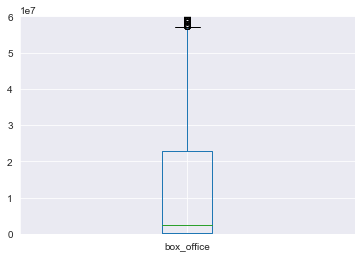

In [34]:
# Выведем основные характеристики распределения методом describe 
display (data['box_office'].describe())

# Построим диаграмму размаха
plt.ylim(0,60000000)
data.boxplot('box_office');

Медианная сумма сборов равна 2,3 млн рублей. Согласно диаграмме, сумма сборов выше 58 млн является выбросом. Посмотрим, сколько таких фильмов.

In [35]:
# Посчитаем, сколько фильмов со сборами, которые превышают 58 млн. рублей
data.query('box_office > 58000000')['box_office'].count()

524

Более 17%, удалять такое количество строк было бы нецелесообразно. Посмотрим на фильмы с самыми астрономическими собрами: построим срез с фильмами, сборы которых превышают 2,5 млрд. рублей.

In [36]:
# Построим срез с фильмами, сборы которых превышают 2,5 млрд. рублей.
data.query('box_office > 2500000000 ')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,total_support
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00",2017,"400,000,000.00"
6819,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,0.00,0.00,NaN,Другое,7.60,"фантастика,боевик,драма","2,576,613,776.83",2019,0.00
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",2019,"60,000,000.00"


Такие суммы сборов соответствуют реальности: "Холоп" и "Движение вверх" являются самыми кассовыми отечественными фильмами в истории российского кино, вот статья на эту тему - https://lifehacker.ru/samye-kassovye-rossijskie-filmy/. Оставляем эти значения без изменений.

Теперь проверим бюджеты.

count             314.00
mean      134,370,273.69
std       191,469,238.63
min        14,462,464.00
25%        46,153,856.25
50%        73,725,736.00
75%       150,006,429.75
max     2,305,074,303.00
Name: budget, dtype: float64

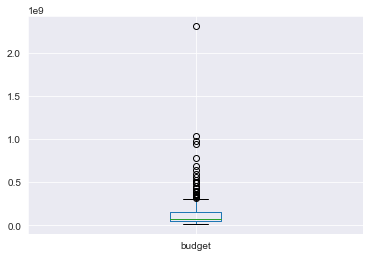

In [37]:
# Выведем основные характеристики распределения методом describe 
display (data['budget'].describe())

# Построим диаграмму размаха
plt.ylim()
data.boxplot('budget');

Здесь также довольно много фильмов с бюджетом выше значения третьего квартиля: сразу проверим фильм с самым большим бюджетом. 

In [38]:
# Посмотрим на фильм с самым высоким бюджетом
data.loc[data['budget'] == data['budget'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,total_support
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59",2019,"270,000,000.00"


Датасет снова прошел проверку реальностью: фильм "Тайна Печати Дракон" действительно является одним из самых дорогих фильмов российского кинематографа, статья на эту тему здесь - https://kino.rambler.ru/movies/45463042-samye-dorogie-rossiyskie-filmy-za-vsyu-istoriyu-kino/. Оставляем датасет без изменений.

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [39]:
# Напишем функцию, которая возвращает первый жанр фильма
def main_genre (data):
    return data['genres'].split(',')[0]

# Напишем функцию, которая возвращает первое имя режиссера
def main_director (data):
    return data['director'].split(',')[0]

# Результаты функций запишем в столбцах main_genre и main_director
data['main_genre'] = data.apply(main_genre, axis=1)
data['main_director'] = data.apply(main_director, axis=1)

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [40]:
# Добавим столбец с долей государственной поддержки
data['gov_share'] = data['total_support'] / data['budget']

In [41]:
# Проверим новые столбцы датасета
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,total_support,main_genre,main_director,gov_share
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,...,NaN,Другое,7.20,"боевик,драма,мелодрама",NaN,2015,0.00,боевик,Кевин Костнер,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,...,NaN,Другое,6.60,"драма,военный",NaN,2016,0.00,драма,Е.Матвеев,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,...,NaN,Другое,6.80,"фантастика,боевик,триллер",NaN,2016,0.00,фантастика,Тимур Бекмамбетов,NaN


Все столбцы добавлены.

### Исследовательский анализ данных

Посмотрим, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [42]:
# Cоздадим столбец box_office_bool с булевым массивом, где столбец принимает значение True, если значение box_office больше нуля
data['box_office_bool'] = data['box_office'] > 0

# Создадим сводную таблицу с количеством фильмов, выходивших в проатк и долей таких фильмов,
box_office_analysis = data.pivot_table(index='year',values='box_office_bool',aggfunc=['sum','mean'])
box_office_analysis.columns = ['Кол-во фильмов','Доля проката']
box_office_analysis.index.name = 'Год'

# Выведем результат на экран
box_office_analysis

,Кол-во фильмов,Доля проката
Год,,
2010,89,0.11
2011,105,0.19
2012,120,0.22
2013,177,0.29
2014,264,0.35
2015,442,0.65
2016,498,0.64
2017,355,0.71
2018,470,0.53


Построим графики на основании данных выше:

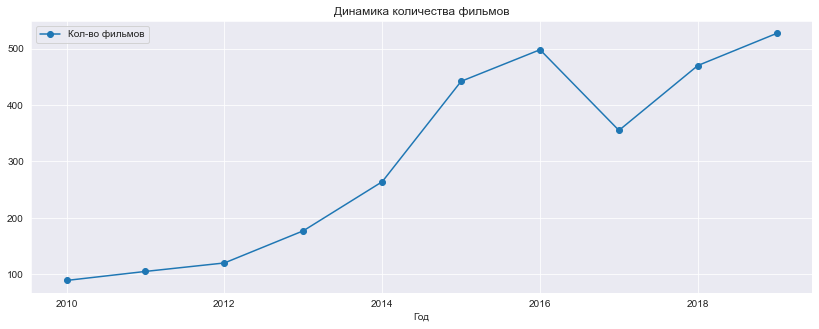

In [43]:
# Построим график по количеству фильмов
box_office_analysis.plot(y='Кол-во фильмов',
                         style='o-',
                         title='Динамика количества фильмов',
                         figsize=(14,5));

Количество фильмов в прокате росло до 2016 года, в 2017 году случилось падение. В 2019 году количество фильмов вернулось на уровень выше 2017 года.

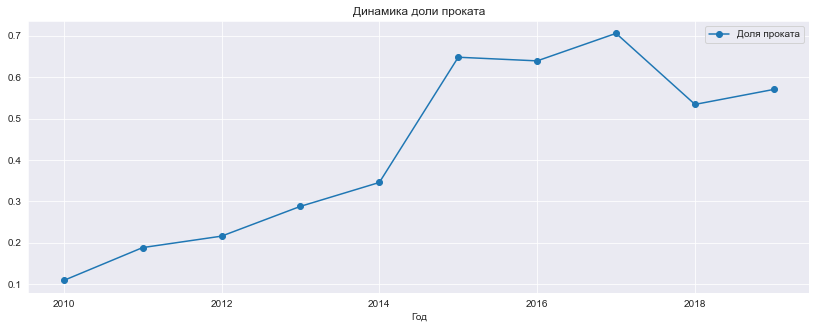

In [44]:
# Построим график по доли проката
box_office_analysis.plot(y='Доля проката',
                         style='o-',
                         title='Динамика доли проката',
                         figsize=(14,5));
                        

График доли фильмов в прокате выглядит иначе: в 2017 году, несмотря на спад в количестве фильмов, доля фильмов была максимальной (70%).

Построим срез данных, в которых есть данные о прокате. На основании среза построим график по сборам в динамике по годам.


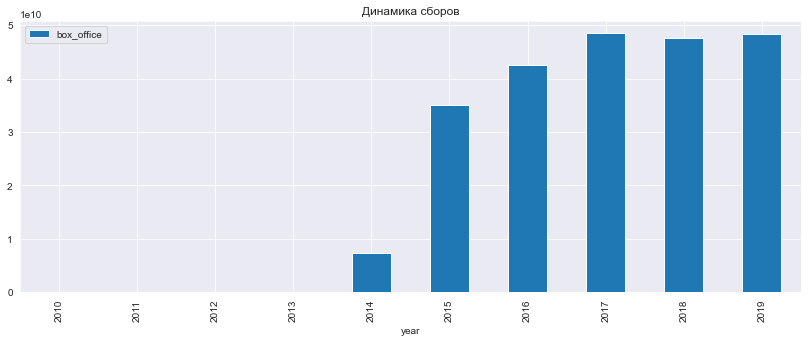

In [45]:
# Построим срез данных, в которых есть данные о прокате
box_office_data = data.query('box_office_bool == True')

# Построим график по сборам в разрезе по годам
(box_office_data.pivot_table(index='year',values='box_office', aggfunc='sum')
                .plot(kind='bar',
                      title='Динамика сборов',
                      figsize=(14,5))
);

Минимальная сумма сборов была в период с 2010 по 2013 годы. Максимальная сумма сбора зафиксирована в 2017 году.

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [46]:
# Построим сводную таблицу со средними и медианными значениями сборов
box_office_data.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
year,,
2010,"26,923.93","2,050.00"
2011,"134,204.19","3,085.00"
2012,"57,918.73","6,692.50"
2013,"168,354.61","3,780.00"
2014,"28,157,045.23","22,575.00"
2015,"79,333,389.38","4,742,671.67"
2016,"85,557,242.00","3,498,728.50"
2017,"136,501,823.25","9,919,415.00"


Выведем средние и медианные значения на линейный график.

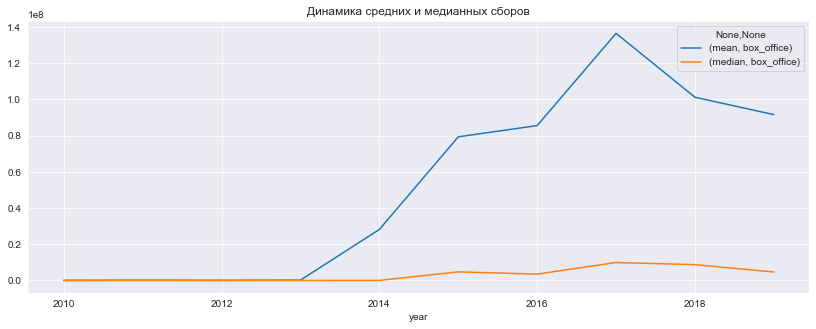

In [47]:
# Построим график по сврдной таблице выше
box_office_data.pivot_table(index='year',
                            values='box_office',
                            aggfunc=['mean','median']).plot(figsize=(14,5),
                                                            title='Динамика средних и медианных сборов');

Разница значений огромная: средние значения значительно выше медианных. Это связано с тем, что в датасете больше количество выбросов, которые искажают средние значения. Для этого датасета в качестве меры центральной тенденции лучше ориентироваться на медиану, так как она меньше подвержена влиянию выбросов.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

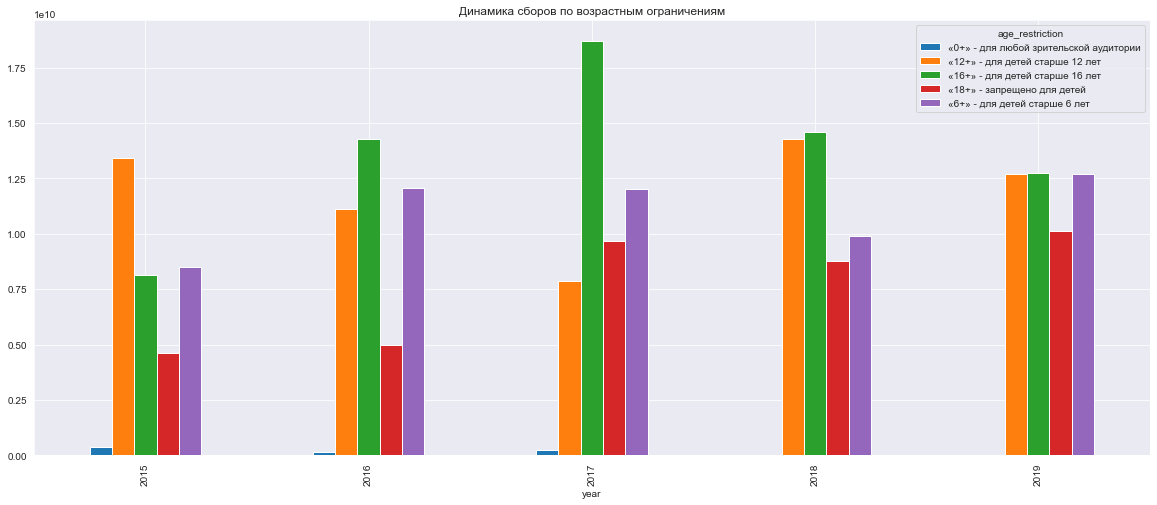

In [48]:
# Создадим срез данных за период с 2015 год по 2019 год включительно
year_data = box_office_data.query('2015 <= year <= 2019')

# Построим столбчатые диаграммы с суммой сборов по годам в разбике на типы возрастных ограничений
(year_data.pivot_table(index='year', 
                       columns='age_restriction', 
                       values='box_office', 
                       aggfunc='sum').plot(kind='bar',
                                           figsize=(20,8),
                                           title='Динамика сборов по возрастным ограничениям'));

График позволяет ответить  на вопрос о том, фильмы какой категории собирают больше всех денег в прокате: как правило, это фильмы с категорией "16+". В 2019 годах сборы фильмов уменьшились, а сборы фильмов категории "16+" стали примерно таким же, как фильмы категорий "12+" и "6+".

Судить о связи возрастной категории по сумме сборов будет некорректно, так как сумма сборов зависит в том числе от количестваи фильмов. Рассмотрим медианные значения суммы сборов по возрастным категориям.

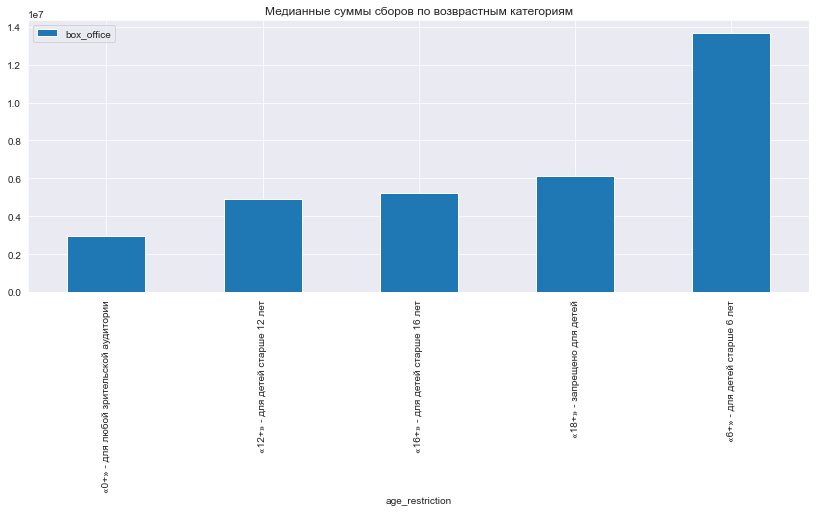

In [49]:
(year_data.pivot_table(index='age_restriction', 
                       values='box_office', 
                       aggfunc='median').plot(kind='bar',
                                              figsize=(14,5),
                                              title='Медианные суммы сборов по возврастным категориям'));

Судя по графику, возрастная категория фильмов влияет на сборы, так как медианные суммы сборов различных возрастных категорий отличаются: фильмов категории "6+" самая высокая медианная сумма сборов, а у категории "0+" - самая низкая.

### Исследование фильмов с государственной поддержкой

В рамках данного шага будет проводиться анализ следующих показателей в различных разрезах:

* сумма государственной поддержки;
* окупаемость;
* доля суммы государственной поддержки в общем бюджете фильма.

Для начала добавим в исходный датафрейм столбец с окупаемостью, разделив сумму сборов на бюджет. Целевое значение, при котором фильм можно считать окупившимся, должно равняться единице или выше.

In [50]:
# В исходном датафрейме создадим столбец profitability с окупаемостью фильмов
data['profitability'] = data['box_office'] / data['budget']

Далее ограничим область анализа фильмами с государственной поддержкой: сделаем срез датафрейма со значениями `total_support` больше нуля.

In [51]:
# Создадим срез датафрейма со строками, где сумма государственной поддержки больше нуля
gov_support_data = data.query('total_support > 0')

Теперь посмотрим, как менялся размер государственной поддержки из года в год.

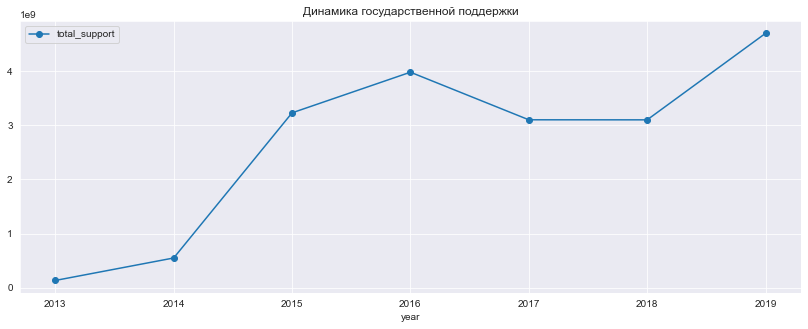

In [52]:
gov_support_data.pivot_table(index='year',
                             values='total_support',
                             aggfunc='sum').plot(style='o-',
                                                 title='Динамика государственной поддержки',
                                                 figsize=(14,5));

С 2013 год по 2016 год включительно сумма поддержки росла. В 2017 году и в 2018 году этот показатель упал до значений чуть ниже 2015 года. Максимальная сумма господдержки была достигнута в 2019 году (почти 5 млрд. рублей).

Посмотрим, на фильмы с каким возрастным ограничением выделяется больше всего денег - построим круговую диагрумму.

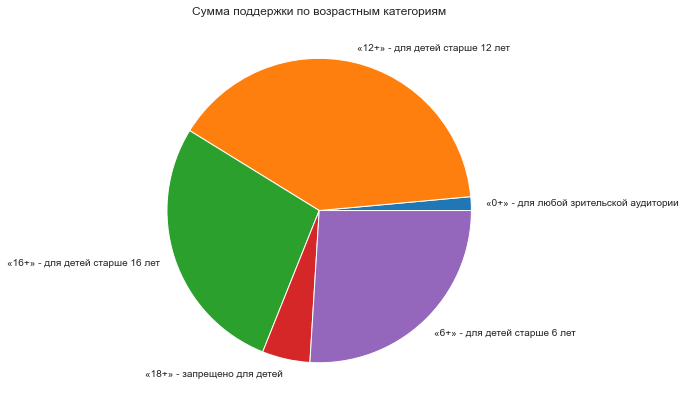

In [53]:
(gov_support_data
                .pivot_table(index='age_restriction',
                             values='total_support',
                             aggfunc='sum')
                .plot(y='total_support',
                      kind='pie',
                      legend = False,
                      title='Сумма поддержки по возрастным категориям',
                      figsize=(7, 7)));

plt.ylabel('');



Больше всего средств выделяется на фильмы с возрастны рейтингами "12+", "16+" и "6+".

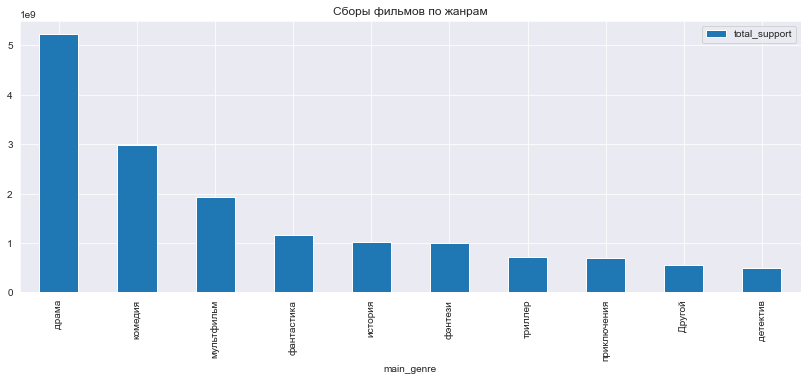

In [54]:
(gov_support_data
                .pivot_table(index='main_genre',values='total_support',aggfunc='sum')
                .sort_values(by='total_support', ascending  = False)
                .head(10)
                .plot(kind='bar', title='Сборы фильмов по жанрам', figsize=(14,5))
);

Наибольшие суммы денежных средств выделяются на фильмы в жанре "драма", "комедия" и "мультфильм".

Теперь изучим окупаемость фильмов: посмотрим, как из года в год менялась медианная окупаемость фильмов.

0.14951929268189362

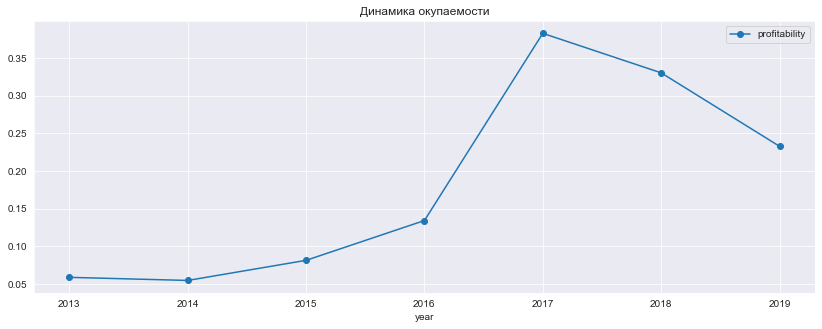

In [55]:
gov_support_data.pivot_table(index='year',
                             values='profitability',
                             aggfunc='median').plot(style='o-',
                                                    figsize=(14,5),
                                                    title='Динамика окупаемости');
gov_support_data['profitability'].median()

Фильмы с государственной поддержкой не окупаются: самая высокая окупаемость картин была в 2017 году (порядка 37%). Медианная окупаемость фильмов за все годы составила менее 15%.

Посмотрим, фильмы с каким жанром окупаются лучше всех остальных:

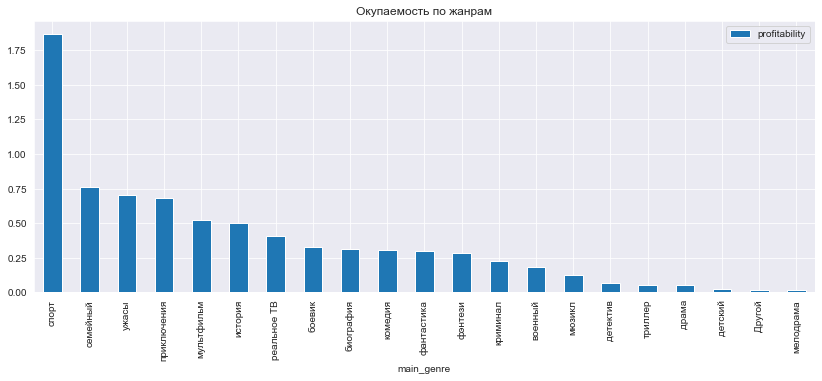

In [56]:
(gov_support_data
                .pivot_table(index='main_genre',values='profitability',aggfunc='median')
                .sort_values(by='profitability',ascending=False)
                .plot(kind='bar',figsize=(14,5),title='Окупаемость по жанрам')
);

Единственный окупающийся жанр - это "спорт", в этом жанре окупаемость составила более 175%. Лучше всего окупаются также семейные фильмы, фильмы ужасов и приключенческие фильмы. Самые низкоокупаемые жанры, не считая жанра "другие" - это "мелодрама", "драма" и "детский".

Посмотрим, как окупаемость коррелирует с другими показателями: проверим корреляцию окупаемости и рейтинга.

0.06332967424607024

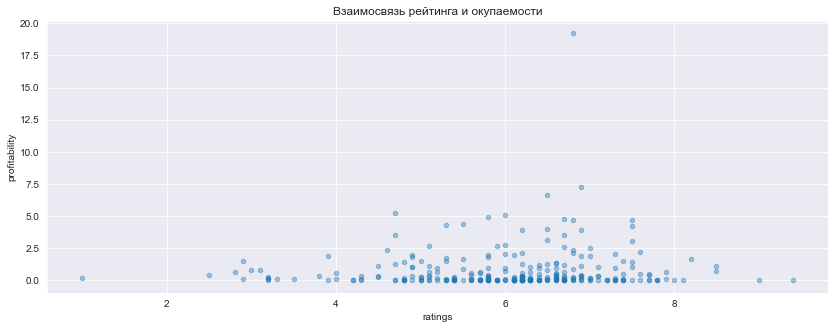

In [57]:
# Посчитаем коэффициент корреляции
display (gov_support_data['ratings'].corr(data['profitability']))

# Построим диаграмму рассеяния
gov_support_data.plot(x='ratings',
                      y='profitability',
                      kind='scatter',
                      alpha=0.4,
                      figsize=(14,5),
                      title='Взаимосвязь рейтинга и окупаемости');

Между рейтингом и окупаемость фильма почти нет взаимосвязи. Интересно также проверить корреляцию бюджета и окупаемости.

0.08747535492035664

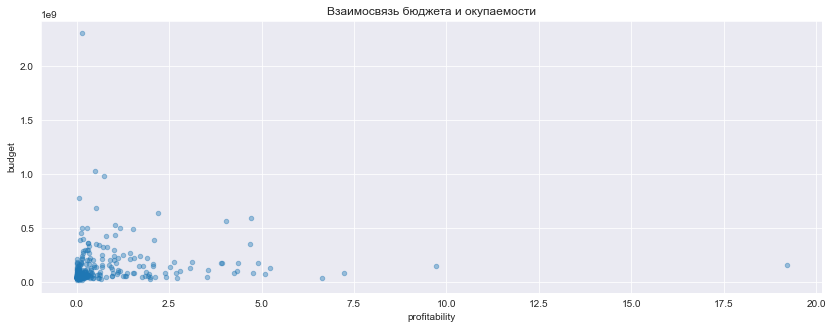

In [58]:
# Посчитаем коэффициент корреляции
display (gov_support_data['profitability'].corr(data['budget']))

# Построим диаграмму рассеяния
gov_support_data.plot(x='profitability',
                      y='budget',
                      kind='scatter',
                      alpha=0.4,
                      figsize=(14,5),
                      title='Взаимосвязь бюджета и окупаемости');

Между бюджетом фильма и окупаемостью есть слабая положительная взаимосвязь.

Теперь изучим показатель доли государственной поддержки: посмотрим, как доля меняется по годам.

0.5917384241210266

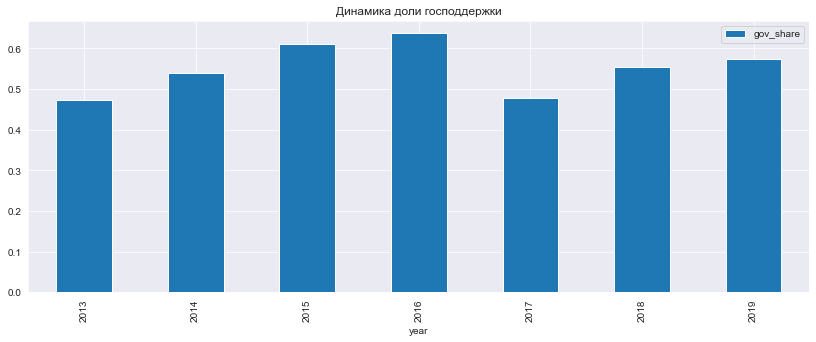

In [59]:
gov_support_data.pivot_table(index='year',
                             values='gov_share',
                             aggfunc='median').plot(kind='bar',
                                                    title='Динамика доли господдержки',
                                                    figsize=(14,5));

gov_support_data['gov_share'].median()

Медианная доля поддержки в фильмах с государственным финансированием составляет почти 60%, самая высокая доля была в 2016 году (порядка 65%), самая низкая - в 2017 году (чуть менее 50%). Проверим доли господдержки для жанров:

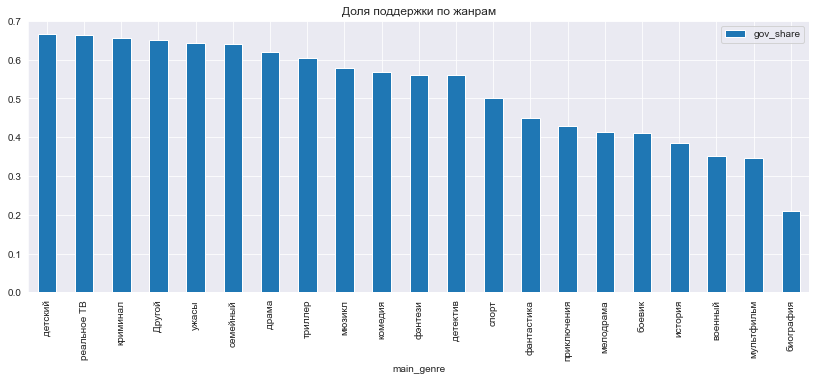

In [60]:
(gov_support_data
                .pivot_table(index='main_genre', values='gov_share', aggfunc='median')
                .sort_values(by='gov_share', ascending = False)
                .plot(kind='bar', figsize=(14,5), title='Доля поддержки по жанрам')
);

В большинстве жанров доля поддержки превышает 50% бюджета. Жанры с самой низкой долей поддержки - это биография, мультфильм и военный.

Посмотрим также, как распределен рейтинг фильмов с государственной поддержкой. 

count   299.00
mean      6.04
std       1.16
min       1.00
25%       5.40
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

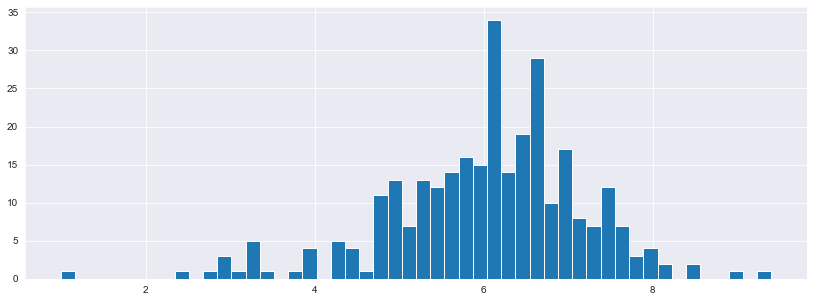

In [61]:
display (gov_support_data['ratings'].describe())
gov_support_data['ratings'].hist(bins=50, figsize=(14,5));

Наиболее частый рейтинг в районе 6.2 баллов.

Проверим, как меняется рейтинг фильмов с господдержкой с течением времени

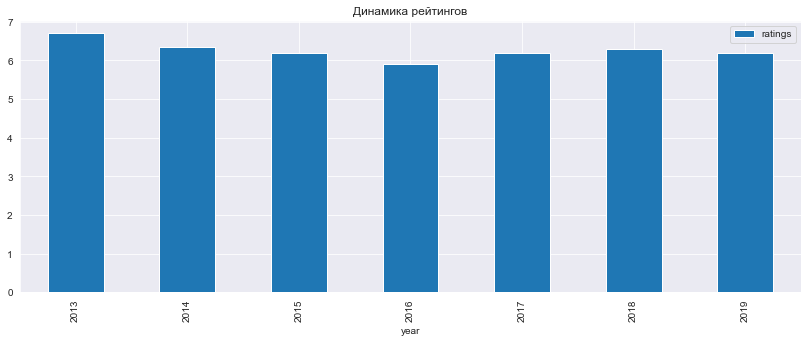

In [62]:
(gov_support_data
                .pivot_table(index='year',values='ratings',aggfunc='median')
                .plot(kind='bar', figsize=(14,5), title='Динамика рейтингов')
);

Медианный рейтинг фильмов меняется незначительно и колеблется примерно от 5.9 до 6.7 баллов.

Наконец, посмотрим, какие доли возвратной и невозвратной помощи во всей сумме поддержки.

In [63]:
refundable_support = gov_support_data['refundable_support'].sum()
nonrefundable_support = gov_support_data['nonrefundable_support'].sum()
total_support = gov_support_data['total_support'].sum()

refundable_support_share = refundable_support / total_support
nonrefundable_support_share = nonrefundable_support / total_support

display (refundable_support_share,nonrefundable_support_share)

0.19463521605383136

0.8053647839461686

Более 80% государственной поддержки составляют невозвратные средства. То есть, в 80% случаев государство не требует возврата денежных средств от создателей картин.

### Вывод

В ходе исследования были получены следующие выводы:

* До 2016 года количество фильмов в прокате росло. В 2017 году случилось падение, при этом доля фильмов в прокате была максимальной (70%).В 2019 году количество фильмов вернулось на уровень 2017 года.
* Минимальная сумма сборов была в период с 2010 по 2013 годы. Максимальная сумма сбора зафиксирована в 2018 году.
* В период с 2016 год по 2018 год категория фильмов "16+" собирала больше всего денег. В 2019 году общие сборы упали, а доля сборов фильмов категории "16+" сравнялась с категориями "12+" и "6+".
* Возрастное ограничение аудитории влияет на сумму сборов: самая высокая медианная сумма сборов у фильмов категории "6+".
* С 2013 год по 2016 год  сумма государственной поддержки росла. В 2017 году и в 2018 году этот показатель упал до значений чуть ниже 2015 года. Максимальная сумма господдержки была достигнута в 2019 году (почти 5 млрд. рублей). Больше всего средств выделяется на фильмы с возрастны рейтингами "12+", "16+" и "6+" и на жанры "драма", "комедия" и "мультфильм".
* Фильмы с государственной поддержкой не окупаются: медианная окупаемость фильмов за все годы составила менее 15%. Самая высокая окупаемость картин была в 2017 году (порядка 37%). 
* Единственный окупающийся жанр - это "спорт", в этом жанре окупаемость составила более 175%. Лучше всего окупаются также семейные фильмы, фильмы ужасов и приключенческие фильмы. Самые низкоокупаемые жанры, не считая жанра "другие" - это "мелодрама", "драма" и "детский".
* Между рейтингом и окупаемость фильма почти нет взаимосвязи, в то в время как между бюджетом фильма и окупаемостью есть слабая положительная взаимосвязь.
* Медианная доля поддержки в фильмах с государственным финансированием составляет почти 60%, самая высокая доля была в 2016 году (порядка 65%), самая низкая - в 2017 году (чуть менее 50%). В большинстве жанров доля поддержки превышает 50% бюджета. Жанры с самой низкой долей поддержки - это биография, мультфильм и военный.
* Наиболее частый рейтинг фильмов с государственной поддержкой - 6.2 баллов. По годам медианный рейтинг фильмов меняется незначительно и колеблется примерно от 5.9 до 6.7 баллов.
* Более 80% государственной поддержки составляют невозвратные средства. То есть, в 80% случаев государство не требует возврата денежных средств от создателей картин.